Introduction
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.`

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
class_counts = df['Class'].value_counts().sort_index() # class distribution---
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

In [4]:
#Finding the null values
df.isna().sum()   

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

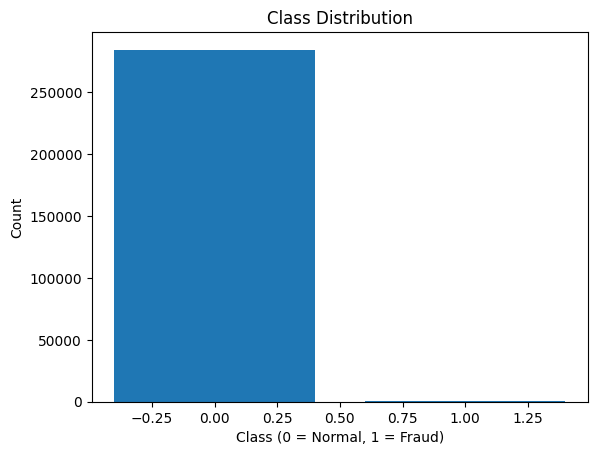

In [5]:
# Visualization of the class distribution

plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [6]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])     # scaling the amount column using Standard Scaler

In [7]:
#Feature and Target
X = df.drop('Class',axis=1)
y = df['Class']

# Splitting the data in training and testing sets to train the model
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
# Handling the imbalance data using smote and the fraud percentage is minute
smote =  SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Logistic Regression Model

In [9]:
logr = LogisticRegression(max_iter=1000)

logr.fit(X_resampled,y_resampled)

# Predictions 
y_pred_logr = logr.predict(x_test)     # -------predicted values
y_prob = logr.predict_proba(x_test)[:, 1] 

C:\Users\lijoj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# 9. Evaluation

from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[56244   620]
 [    9    89]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

ROC-AUC Score: 0.9759633260310314


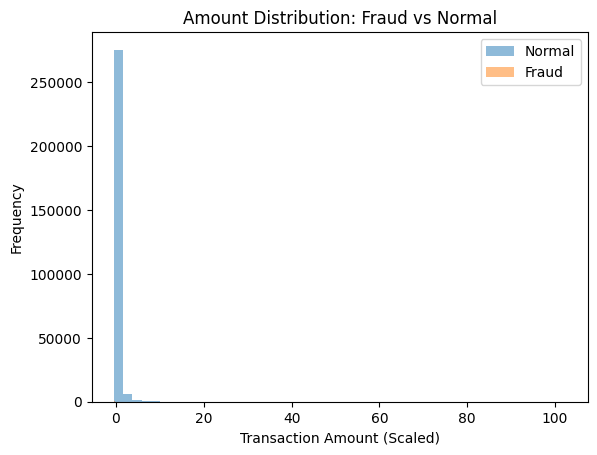

In [11]:
# 10. Fraud vs Normal Amount Distribution
fraud = df[df["Class"] == 1]["Amount"]
normal = df[df["Class"] == 0]["Amount"]

plt.figure()
plt.hist(normal, bins=50, alpha=0.5, label="Normal")
plt.hist(fraud, bins=50, alpha=0.5, label="Fraud")
plt.xlabel("Transaction Amount (Scaled)")
plt.ylabel("Frequency")
plt.title("Amount Distribution: Fraud vs Normal")
plt.legend()
plt.show()


# Random Forest

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv("creditcard.csv")

# Scale Amount
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])

# Features & Target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_res, y_res)

# Predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[56824    40]
 [   14    84]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.86      0.76        98

    accuracy                           1.00     56962
   macro avg       0.84      0.93      0.88     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9769756770181341


In [13]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

V14    0.215111
V10    0.126560
V4     0.115333
V12    0.107257
V17    0.083158
V3     0.078270
V11    0.046944
V16    0.042599
V2     0.036726
V9     0.025958
dtype: float64